In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Selecting X and y

In [5]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [6]:
#X,y

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Feature Scaling - data in fixed range

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# ``SVM``

In [9]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=4)
model_svc.fit(X_train, y_train)

SVC(random_state=4)

In [10]:
y_pred_svm = model_svc.decision_function(X_test)

# ``Logistic Regression``

In [11]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred_logistic = model_logistic.decision_function(X_test)

# Plot ``ROC-AUC`` curve

In [13]:
from sklearn.metrics import roc_curve, auc

### ``Logistic Regression``

In [14]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)

In [15]:
len(threshold)

48

In [16]:
auc_logistic = auc(logistic_fpr,logistic_tpr )

In [17]:
auc_logistic

0.8146923783287419

### ``Support Vector Machine``

In [18]:
svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svc = auc(svc_fpr, svc_tpr)

In [19]:
auc_svc

0.8049586776859504

### ``Drawing``

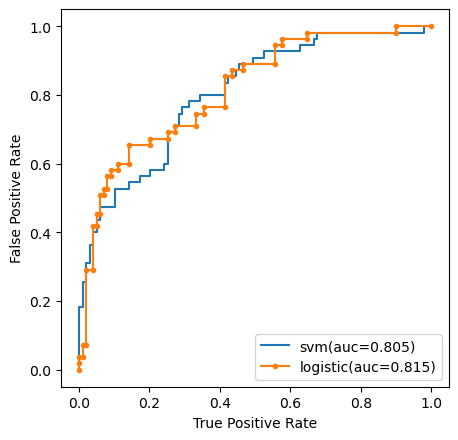

In [22]:
plt.figure(figsize=(5,5), dpi=100)

plt.plot(svc_fpr, svc_tpr, linestyle='-', label='svm(auc=%0.3f)' % auc_svc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', linestyle='-', label='logistic(auc=%0.3f)' % auc_logistic)

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.legend()
plt.show()